# Jay Cherukuri and Divya Gandhi


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR

ames_train=pd.read_csv('train.csv')
ames_test=pd.read_csv('test.csv')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Data Exploration

### Basic Statistics and Data Types

In [ ]:
ames_train.info()
ames_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Sale Price Distribution

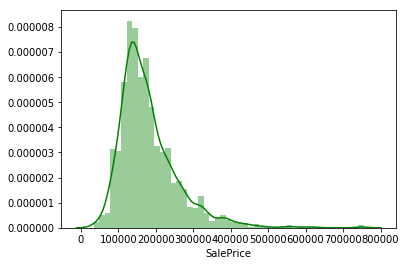

In [ ]:
sns.distplot(ames_train['SalePrice'], color = 'Green')
plt.show()

### Null Values?

In [ ]:
print(ames_train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Dropping Columns with Significant Missing Data

In [ ]:
ames_train = ames_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage','GarageYrBlt'],axis = 1)

#### Dealing with Smaller Amounts of Missing Values

##### MasVnr

In [ ]:
tempames_train = ames_train[['Id', 'MasVnrType', 'MasVnrArea']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,MasVnrType,MasVnrArea
234,235,NaN,NaN
529,530,NaN,NaN
650,651,NaN,NaN
936,937,NaN,NaN
973,974,NaN,NaN
977,978,NaN,NaN
1243,1244,NaN,NaN
1278,1279,NaN,NaN


Given that each corresonding row is null for these two null columns, none is filled in for type and 0 for area (no MasVrn)

In [ ]:
ames_train[['MasVnrType']] = ames_train[['MasVnrType']].fillna('None')
ames_train[['MasVnrArea']] = ames_train[['MasVnrArea']].fillna(0)

##### Electrical

In [ ]:
tempames_train = ames_train[['Id', 'Electrical']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,Electrical
1379,1380,NaN


Id 1380 has a null value for the electrical system.  This represents a data error.  The most frequently occuring electrical system is filled in for that value.

In [ ]:
ames_train.loc[1379, 'Electrical'] = 'SBrkr'

##### Basement Features

In [ ]:
tempames_train = ames_train[['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,18,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,40,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,91,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,103,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,157,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,183,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,260,NaN,NaN,NaN,NaN,0,NaN,0,0,0
332,333,Gd,TA,No,GLQ,1124,NaN,479,1603,3206
342,343,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,363,NaN,NaN,NaN,NaN,0,NaN,0,0,0


Id 333 has a null value for BsmtFinType2 despite having SF listed.  This is a data error.  We will fill that cell in with the most frequently occuring element (Unf.)

In [ ]:
ames_train.loc[332, 'BsmtFinType2'] = 'Unf'

Id 948 has a null value for BsmtExposure despite having some square footage.  This is a data error.  We will fill that cell in with no exposure. 

In [ ]:
ames_train.loc[948, 'BsmtExposure'] = 'No'

The other null values correspond to those houses that didn't have a basement.  We will fill that in with values that correspond to no basement.  

In [ ]:
ames_train['BsmtFinType1'] = ames_train['BsmtFinType1'].fillna('NA')
ames_train['BsmtFinType2'] = ames_train['BsmtFinType2'].fillna('NA')
ames_train['BsmtExposure'] = ames_train['BsmtExposure'].fillna('NA')
ames_train['BsmtQual'] = ames_train['BsmtQual'].fillna('NA')
ames_train['BsmtCond'] = ames_train['BsmtCond'].fillna('NA')

##### Garage Features

In [ ]:
tempames_train = ames_train[['Id', 'GarageType', 'GarageArea', 'GarageCond', 'GarageQual']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,GarageType,GarageArea,GarageCond,GarageQual
39,40,NaN,0,NaN,NaN
48,49,NaN,0,NaN,NaN
78,79,NaN,0,NaN,NaN
88,89,NaN,0,NaN,NaN
89,90,NaN,0,NaN,NaN
99,100,NaN,0,NaN,NaN
108,109,NaN,0,NaN,NaN
125,126,NaN,0,NaN,NaN
127,128,NaN,0,NaN,NaN
140,141,NaN,0,NaN,NaN


The other null values correspond to those houses that didn't have a basement.  We will fill that in with values that correspond to no basement.  

In [ ]:
ames_train['GarageType'] = ames_train['GarageType'].fillna('NA')
ames_train['GarageCond'] = ames_train['GarageCond'].fillna('NA')
ames_train['GarageQual'] = ames_train['GarageQual'].fillna('NA')
ames_train['GarageFinish'] = ames_train['GarageFinish'].fillna('NA')

### Other Data Errors

##### Exterior2nd

In [ ]:
print(ames_train['Exterior2nd'].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


There are several columns with misspelled tags.  CmentBd should be CemntBd.  Wd Shng should be WdShing.  Brk Cmn should be BrkComm.

In [ ]:
ames_train['Exterior2nd'] = ames_train['Exterior2nd'].replace('Brk Cmn', 'BrkComm').replace('CmentBd', 'CemntBd').replace('Wd Shng', 'WdShing')

### Encoding Categorical Variables

In [ ]:
# Ideally, the label encoder would be used for features in which there is little meaning.  However, when it comes time to make the accompanying changes to the testing set for prediction, the label encoder may encode the variables ina different way, throwing off accuracy.  Mapping the values in the only real choice.  
#e = preprocessing.LabelEncoder()
#ames_train['MSSubClass'] = e.fit_transform(ames_train.MSSubClass.values)
#ames_train['MSZoning'] = e.fit_transform(ames_train.MSZoning.values)
#ames_train['Street'] = e.fit_transform(ames_train.Street.values)
#ames_train['Utilities'] = e.fit_transform(ames_train.Utilities.values)
#ames_train['LotConfig'] = e.fit_transform(ames_train.LotConfig.values)
#ames_train['Neighborhood'] = e.fit_transform(ames_train.Neighborhood.values)
#ames_train['Condition1'] = e.fit_transform(ames_train.Condition1.values)
#ames_train['Condition2'] = e.fit_transform(ames_train.Condition2.values)
#ames_train['HouseStyle'] = e.fit_transform(ames_train.HouseStyle.values)
#ames_train['RoofStyle'] = e.fit_transform(ames_train.RoofStyle.values)
#ames_train['RoofMatl'] = e.fit_transform(ames_train.RoofMatl.values)
#ames_train['Exterior1st'] = e.fit_transform(ames_train.Exterior1st.values)
#ames_train['Exterior2nd'] = e.fit_transform(ames_train.Exterior2nd.values)
#ames_train['MasVnrType'] = e.fit_transform(ames_train.MasVnrType.values)
#ames_train['Foundation'] = e.fit_transform(ames_train.Foundation.values)
#ames_train['Heating'] = e.fit_transform(ames_train.Heating.values)
#ames_train['Electrical'] = e.fit_transform(ames_train.Electrical.values)
#ames_train['Functional'] = e.fit_transform(ames_train.Functional.values)
#ames_train['SaleType'] = e.fit_transform(ames_train.SaleType.values)
#ames_train['SaleCondition'] = e.fit_transform(ames_train.SaleCondition.values)
#ames_train['LandContour'] = e.fit_transform(ames_train.LandContour.values)
#ames_train['BldgType'] = e.fit_transform(ames_train.BldgType.values)

#### Mapping Variables Without Meaning to their Order

In [ ]:
# Mapping Variables Without Meaning in their Order
ames_train['MSZoning'] = ames_train['MSZoning'].replace('A', 0).replace('C (all)', 1).replace('FV', 2).replace('I', 3).replace('RH', 4).replace('RL', 5).replace('RP', 6).replace('RM', 7)
ames_train['Street'] = ames_train['Street'].replace('Grvl', 0).replace('Pave', 1)
ames_train['Utilities'] = ames_train['Utilities'].replace('AllPub', 3).replace('NoSewr', 2).replace('NoSeWa', 1).replace('ELO', 0)
ames_train['LotConfig'] = ames_train['LotConfig'].replace('Inside', 0).replace('Corner', 1).replace('CulDSac', 2).replace('FR2', 3).replace('FR3', 4)
ames_train['Neighborhood'] = ames_train['Neighborhood'].replace('Blmngtn',0).replace('Blueste',1).replace('BrDale',2).replace('BrkSide',3).replace('ClearCr',4).replace('CollgCr',5).replace('Crawfor',6).replace('Edwards',7).replace('Gilbert',8).replace('IDOTRR',9).replace('MeadowV',10).replace('Mitchel',11).replace('Names',12).replace('NAmes',12).replace('NoRidge',13).replace('NPkVill',14).replace('NridgHt',15).replace('NWAmes',16).replace('OldTown',17).replace('SWISU',18).replace('Sawyer',19).replace('SawyerW',20).replace('Somerst',21).replace('StoneBr',22).replace('Timber',23).replace('Veenker',24)
ames_train['Condition1'] = ames_train['Condition1'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_train['Condition2'] = ames_train['Condition2'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_train['HouseStyle'] = ames_train['HouseStyle'].replace('1Story', 0).replace('1.5Fin', 1).replace('1.5Unf', 2).replace('2Story', 3).replace('2.5Fin', 4).replace('2.5Unf', 5).replace('SFoyer', 6).replace('SLvl', 7)
ames_train['RoofStyle'] = ames_train['RoofStyle'].replace('Flat', 0).replace('Gable', 1).replace('Gambrel', 2).replace('Hip', 3).replace('Mansard', 4).replace('Shed', 5)
ames_train['RoofMatl'] = ames_train['RoofMatl'].replace('ClyTile', 0).replace('CompShg', 1).replace('Membran', 2).replace('Metal', 3).replace('Roll', 4).replace('Tar&Grv', 5).replace('WdShake', 6).replace('WdShngl', 7)
ames_train['Exterior1st'] = ames_train['Exterior1st'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_train['Exterior2nd'] = ames_train['Exterior2nd'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_train['MasVnrType'] = ames_train['MasVnrType'].replace('BrkCmn', 1).replace('BrkFace', 2).replace('CBlock', 3).replace('None', 0).replace('Stone', 4)
ames_train['Foundation'] = ames_train['Foundation'].replace('BrkTil', 0).replace('CBlock', 1).replace('PConc', 2).replace('Slab', 3).replace('Stone', 4).replace('Wood', 5)
ames_train['Heating'] = ames_train['Heating'].replace('Floor', 0).replace('GasA', 1).replace('GasW', 2).replace('Grav', 3).replace('OthW', 4).replace('Wall', 5)
ames_train['Electrical'] = ames_train['Electrical'].replace('SBrkr', 0).replace('FuseA', 1).replace('FuseF', 2).replace('FuseP', 3).replace('Mix', 4)
ames_train['Functional'] = ames_train['Functional'].replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Maj1', 3).replace('Maj2', 2).replace('Sev', 1).replace('Sal', 0)
ames_train['SaleType'] = ames_train['SaleType'].replace('WD', 0).replace('CWD', 1).replace('VWD', 2).replace('New', 3).replace('COD', 4).replace('Con', 5).replace('ConLw', 6).replace('ConLI', 7).replace('ConLD', 8).replace('Oth', 9)
ames_train['SaleCondition'] = ames_train['SaleCondition'].replace('Normal', 0).replace('Abnorml', 1).replace('AdjLand', 2).replace('Alloca', 3).replace('Family', 4).replace('Partial', 5)
ames_train['LandContour'] = ames_train['LandContour'].replace('Lvl', 0).replace('Bnk', 1).replace('HLS', 2).replace('Low', 3)
ames_train['BldgType'] = ames_train['BldgType'].replace('1Fam', 0).replace('2fmCon', 1).replace('Duplex', 2).replace('TwnhsE', 3).replace('Twnhs', 4)

#### Mapping Variables With Meaning to their Order

In [ ]:
ames_train['LotShape'] = ames_train['LotShape'].replace('Reg', 0).replace('IR1', 1).replace('IR2', 2).replace('IR3', 3)
ames_train['LandSlope'] = ames_train['LandSlope'].replace('Gtl', 0).replace('Mod', 1).replace('Sev', 2)
ames_train['ExterQual'] = ames_train['ExterQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['ExterCond'] = ames_train['ExterCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['BsmtQual'] = ames_train['BsmtQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['BsmtCond'] = ames_train['BsmtCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['HeatingQC'] = ames_train['HeatingQC'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['KitchenQual'] = ames_train['KitchenQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['GarageQual'] = ames_train['GarageQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['GarageCond'] = ames_train['GarageCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['BsmtExposure'] = ames_train['BsmtExposure'].replace('Gd', 4).replace('Av', 3).replace('Mn', 2).replace('No', 1).replace('NA', 0)
ames_train['BsmtFinType1'] = ames_train['BsmtFinType1'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_train['BsmtFinType2'] = ames_train['BsmtFinType2'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_train['CentralAir'] = ames_train['CentralAir'].replace('N', 0).replace('Y', 1)
ames_train['GarageType'] = ames_train['GarageType'].replace('NA', 0).replace('2Types', 1).replace('Attchd', 2).replace('Basment', 3).replace('BuiltIn', 4).replace('CarPort', 5).replace('Detchd', 6)
ames_train['GarageFinish'] = ames_train['GarageFinish'].replace('Fin', 3).replace('RFn', 2).replace('Unf', 1).replace('NA', 0)
ames_train['PavedDrive'] = ames_train['PavedDrive'].replace('Y', 2).replace('P', 1).replace('N', 0)

#### Mean and Variance

In [ ]:
ames_train.describe().loc[['mean']]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
mean,730.5,56.89726,5.126712,10516.828082,0.99589,0.408219,0.185616,2.99863,0.416438,0.062329,12.24863,2.030822,2.006849,0.444521,1.562329,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,10.758904,10.867123,0.970548,103.117123,3.39589,3.083562,1.396575,3.489041,2.934932,1.630822,3.54589,443.639726,1.247945,46.549315,567.240411,1057.429452,1.036301,4.145205,0.934932,0.110274,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,6.841781,0.613014,3.09726,1.715753,1.767123,472.980137,2.810274,2.808904,1.856164,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.490411,0.582192,180921.19589


In [ ]:
ames_train.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
MSZoning         1.103193e+00
LotArea          9.962565e+07
Street           4.095505e-03
LotShape         3.390688e-01
LandContour      3.678533e-01
Utilities        2.739726e-03
LotConfig        5.982217e-01
LandSlope        7.630437e-02
Neighborhood     3.619105e+01
Condition1       7.714962e-01
Condition2       6.163914e-02
BldgType         1.140854e+00
HouseStyle       3.818594e+00
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
RoofStyle        6.972213e-01
RoofMatl         3.589529e-01
Exterior1st      1.670948e+01
Exterior2nd      1.591790e+01
MasVnrType       1.691387e+00
MasVnrArea       3.266383e+04
ExterQual        3.297980e-01
ExterCond        1.232388e-01
Foundation       5.218526e-01
BsmtQual         7.682143e-01
BsmtCond         3.048790e-01
BsmtExposure     1.137775e+00
BsmtFinType1     4.442718e+00
BsmtFinSF1       2.080255e+05
BsmtFinTyp

#### Correlation

In [ ]:
ames_train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.207122
LotArea          0.263843
Street           0.041036
LotShape         0.267759
LandContour      0.073042
Utilities        0.014314
LotConfig        0.092316
LandSlope        0.051152
Neighborhood     0.178883
Condition1       0.083838
Condition2       0.057490
BldgType        -0.112611
HouseStyle       0.063547
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.119614
Exterior2nd      0.111485
MasVnrType       0.424465
MasVnrArea       0.472614
ExterQual        0.682639
ExterCond        0.018899
Foundation       0.382479
BsmtQual         0.585207
BsmtCond         0.212607
BsmtExposure     0.375045
BsmtFinType1     0.304908
BsmtFinSF1       0.386420
BsmtFinType2    -0.004329
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
Heating         -0.098812
HeatingQC   

corrmat = ames_train.corr()
plt.subplots()
sns.heatmap(corrmat, square=True)
plt.title("Correlation Matrix")
plt.show()

#### Scatterplots, Histograms and Regression of Condition/Quality Factors

_ = sns.pairplot(ames_train[['OverallCond', 'ExterCond', 'HeatingQC', 'BsmtCond', 'GarageCond', 'SalePrice']], kind='reg', dropna=True)
plt.show()

_ = sns.pairplot(ames_train[['OverallQual', 'ExterQual', 'HeatingQC', 'BsmtQual', 'GarageQual', 'SalePrice']], kind='reg')
plt.show()

## Testing Set

### Missing Values?

In [ ]:
print(ames_test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Dropping Columns with Significant Missing Data

In [ ]:
ames_test = ames_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage','GarageYrBlt'],axis = 1)

#### Dealing with Smaller Amounts of Missing Values

##### MSZoning

In [ ]:
tempames = ames_test[['MSZoning']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,MSZoning
455,NaN
756,NaN
790,NaN
1444,NaN


Given the data description file, a home has to have a zoning type.  Therefore, the mode value will be filled in.

In [ ]:
ames_test['MSZoning'] = ames_test['MSZoning'].fillna(ames_test['MSZoning'].mode()[0])

##### Utilities

In [ ]:
tempames = ames_test[['Utilities']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Utilities
455,NaN
485,NaN


Given the data description file, a home has to have utilities.  Therefore, the mode value is filled in.

In [ ]:
ames_test['Utilities'] = ames_test['Utilities'].fillna(ames_test['Utilities'].mode()[0])

##### Exterior 1st and 2nd

In [ ]:
tempames = ames_test[['ExterCond', 'Exterior1st', 'Exterior2nd']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,ExterCond,Exterior1st,Exterior2nd
691,TA,NaN,NaN


Given that the material was rated as being in a quality and the training set does not have missing values for either of the exterior matieral columns, that suggests a data error.  The mode value will be filled in.

In [ ]:
ames_test['Exterior1st'] = ames_test['Exterior1st'].fillna(ames_test['Exterior1st'].mode()[0])
ames_test['Exterior2nd'] = ames_test['Exterior2nd'].fillna(ames_test['Exterior2nd'].mode()[0])

##### MasVnrType and MasVnrArea

In [ ]:
tempames = ames_test[['Id','MasVnrType', 'MasVnrArea']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,MasVnrType,MasVnrArea
231,1692,NaN,NaN
246,1707,NaN,NaN
422,1883,NaN,NaN
532,1993,NaN,NaN
544,2005,NaN,NaN
581,2042,NaN,NaN
851,2312,NaN,NaN
865,2326,NaN,NaN
880,2341,NaN,NaN
889,2350,NaN,NaN


Where area is null, the type will be identified as none.  The type for 2611 will be the mode value, given that it does have an area value.  This represents a data error.

In [ ]:
ames_test.loc[1150, 'MasVnrType'] = 'BrkFace'

##### Basement Features

In [ ]:
tempames = ames_test[['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
27,1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
125,1586,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,1594,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,1730,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,1779,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,1815,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
387,1848,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
388,1849,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
396,1857,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
397,1858,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


Id 1488 has a basement, BsmtExposure should be filled in as No for no exposure. The same applies for Id 2349.

Ids 2525, 2041 and 2186 have a null value for BsmtCond, despite a basement obviously being present. That will be filled in with TA, the value representing typical condition. The same holds true for Ids 2218 and 2219 and BsmtQual.

Other null values correspond to those homes that lack a basement. A NA value will be filled in for those columns.

In [ ]:
ames_test.loc[27, 'BsmtExposure'] = 'No'
ames_test.loc[888, 'BsmtExposure'] = 'No'
ames_test.loc[1064, 'BsmtCond'] = 'TA'
ames_test.loc[580, 'BsmtCond'] = 'TA'
ames_test.loc[725, 'BsmtCond'] = 'TA'
ames_test.loc[757, 'BsmtQual'] = 'TA'
ames_test.loc[758, 'BsmtQual'] = 'TA'
ames_test['BsmtFinType1'] = ames_test['BsmtFinType1'].fillna('NA')
ames_test['BsmtFinType2'] = ames_test['BsmtFinType2'].fillna('NA')
ames_test['BsmtExposure'] = ames_test['BsmtExposure'].fillna('NA')
ames_test['BsmtQual'] = ames_test['BsmtQual'].fillna('NA')
ames_test['BsmtCond'] = ames_test['BsmtCond'].fillna('NA')

##### Garage Features

In [ ]:
tempames = ames_test[['Id', 'GarageType','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,1514,NaN,NaN,0.0,0.0,NaN,NaN
71,1532,NaN,NaN,0.0,0.0,NaN,NaN
79,1540,NaN,NaN,0.0,0.0,NaN,NaN
92,1553,NaN,NaN,0.0,0.0,NaN,NaN
96,1557,NaN,NaN,0.0,0.0,NaN,NaN
98,1559,NaN,NaN,0.0,0.0,NaN,NaN
100,1561,NaN,NaN,0.0,0.0,NaN,NaN
130,1591,NaN,NaN,0.0,0.0,NaN,NaN
133,1594,NaN,NaN,0.0,0.0,NaN,NaN
134,1595,NaN,NaN,0.0,0.0,NaN,NaN


ID 2127 has a detached garage,includes an area and can hold a car. The related columns for that record will be filled in with the mode value. ID 2577 has a garage, but has a null value for other columns. This suggests a data error. The type will be replaced with NA, the value for no garage. All other null values will be filled in with NA to reflect the lack of a garage.

In [ ]:
ames_test.loc[666, 'GarageFinish'] = ames_test['GarageFinish'].mode()[0]
ames_test.loc[666, 'GarageQual'] = ames_test['GarageQual'].mode()[0]
ames_test.loc[666, 'GarageCond'] = ames_test['GarageCond'].mode()[0]
ames_test.loc[1116, 'GarageType'] = 'NA'
ames_test['GarageType'] = ames_test['GarageType'].fillna('NA')
ames_test['GarageCond'] = ames_test['GarageCond'].fillna('NA')
ames_test['GarageQual'] = ames_test['GarageQual'].fillna('NA')
ames_test['GarageFinish'] = ames_test['GarageFinish'].fillna('NA')

##### SaleType

In [ ]:
tempames = ames_test[['Id', 'SaleType']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,SaleType
1029,2490,NaN


Given the data description file, a home has to have a SaleType. Therefore, the mode value is filled in.

In [ ]:
ames_test.loc[1029, 'SaleType'] = ames_test['SaleType'].mode()[0]

### Other Data Errors

##### Exterior2nd

In [ ]:
ames_test['Exterior2nd'] = ames_test['Exterior2nd'].replace('Brk Cmn', 'BrkComm').replace('CmentBd', 'CemntBd').replace('Wd Shng', 'WdShing')

In [ ]:
print(ames_test.isnull().sum())

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType       15
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


### Encoding Categorical Variables

#### Mapping Variables Without Meaning to their Order

In [ ]:
ames_test['MSZoning'] = ames_test['MSZoning'].replace('A', 0).replace('C (all)', 1).replace('FV', 2).replace('I', 3).replace('RH', 4).replace('RL', 5).replace('RP', 6).replace('RM', 7)
ames_test['Street'] = ames_test['Street'].replace('Grvl', 0).replace('Pave', 1)
ames_test['Utilities'] = ames_test['Utilities'].replace('AllPub', 3).replace('NoSewr', 2).replace('NoSeWa', 1).replace('ELO', 0)
ames_test['LotConfig'] = ames_test['LotConfig'].replace('Inside', 0).replace('Corner', 1).replace('CulDSac', 2).replace('FR2', 3).replace('FR3', 4)
ames_test['Neighborhood'] = ames_test['Neighborhood'].replace('Blmngtn',0).replace('Blueste',1).replace('BrDale',2).replace('BrkSide',3).replace('ClearCr',4).replace('CollgCr',5).replace('Crawfor',6).replace('Edwards',7).replace('Gilbert',8).replace('IDOTRR',9).replace('MeadowV',10).replace('Mitchel',11).replace('Names',12).replace('NAmes',12).replace('NoRidge',13).replace('NPkVill',14).replace('NridgHt',15).replace('NWAmes',16).replace('OldTown',17).replace('SWISU',18).replace('Sawyer',19).replace('SawyerW',20).replace('Somerst',21).replace('StoneBr',22).replace('Timber',23).replace('Veenker',24)
ames_test['Condition1'] = ames_test['Condition1'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_test['Condition2'] = ames_test['Condition2'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_test['HouseStyle'] = ames_test['HouseStyle'].replace('1Story', 0).replace('1.5Fin', 1).replace('1.5Unf', 2).replace('2Story', 3).replace('2.5Fin', 4).replace('2.5Unf', 5).replace('SFoyer', 6).replace('SLvl', 7)
ames_test['RoofStyle'] = ames_test['RoofStyle'].replace('Flat', 0).replace('Gable', 1).replace('Gambrel', 2).replace('Hip', 3).replace('Mansard', 4).replace('Shed', 5)
ames_test['RoofMatl'] = ames_test['RoofMatl'].replace('ClyTile', 0).replace('CompShg', 1).replace('Membran', 2).replace('Metal', 3).replace('Roll', 4).replace('Tar&Grv', 5).replace('WdShake', 6).replace('WdShngl', 7)
ames_test['Exterior1st'] = ames_test['Exterior1st'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_test['Exterior2nd'] = ames_test['Exterior2nd'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_test['MasVnrType'] = ames_test['MasVnrType'].replace('BrkCmn', 1).replace('BrkFace', 2).replace('CBlock', 3).replace('None', 0).replace('Stone', 4)
ames_test['Foundation'] = ames_test['Foundation'].replace('BrkTil', 0).replace('CBlock', 1).replace('PConc', 2).replace('Slab', 3).replace('Stone', 4).replace('Wood', 5)
ames_test['Heating'] = ames_test['Heating'].replace('Floor', 0).replace('GasA', 1).replace('GasW', 2).replace('Grav', 3).replace('OthW', 4).replace('Wall', 5)
ames_test['Electrical'] = ames_test['Electrical'].replace('SBrkr', 0).replace('FuseA', 1).replace('FuseF', 2).replace('FuseP', 3).replace('Mix', 4)
ames_test['Functional'] = ames_test['Functional'].replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Maj1', 3).replace('Maj2', 2).replace('Sev', 1).replace('Sal', 0)
ames_test['SaleType'] = ames_test['SaleType'].replace('WD', 0).replace('CWD', 1).replace('VWD', 2).replace('New', 3).replace('COD', 4).replace('Con', 5).replace('ConLw', 6).replace('ConLI', 7).replace('ConLD', 8).replace('Oth', 9)
ames_test['SaleCondition'] = ames_test['SaleCondition'].replace('Normal', 0).replace('Abnorml', 1).replace('AdjLand', 2).replace('Alloca', 3).replace('Family', 4).replace('Partial', 5)
ames_test['LandContour'] = ames_test['LandContour'].replace('Lvl', 0).replace('Bnk', 1).replace('HLS', 2).replace('Low', 3)
ames_test['BldgType'] = ames_test['BldgType'].replace('1Fam', 0).replace('2fmCon', 1).replace('Duplex', 2).replace('TwnhsE', 3).replace('Twnhs', 4)

#### Mapping Variables With Meaning to their Order

In [ ]:
ames_test['LotShape'] = ames_test['LotShape'].replace('Reg', 0).replace('IR1', 1).replace('IR2', 2).replace('IR3', 3)
ames_test['LandSlope'] = ames_test['LandSlope'].replace('Gtl', 0).replace('Mod', 1).replace('Sev', 2)
ames_test['ExterQual'] = ames_test['ExterQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['ExterCond'] = ames_test['ExterCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['BsmtQual'] = ames_test['BsmtQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['BsmtCond'] = ames_test['BsmtCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['HeatingQC'] = ames_test['HeatingQC'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['KitchenQual'] = ames_test['KitchenQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['GarageQual'] = ames_test['GarageQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['GarageCond'] = ames_test['GarageCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['BsmtExposure'] = ames_test['BsmtExposure'].replace('Gd', 4).replace('Av', 3).replace('Mn', 2).replace('No', 1).replace('NA', 0)
ames_test['BsmtFinType1'] = ames_test['BsmtFinType1'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_test['BsmtFinType2'] = ames_test['BsmtFinType2'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_test['CentralAir'] = ames_test['CentralAir'].replace('N', 0).replace('Y', 1)
ames_test['GarageType'] = ames_test['GarageType'].replace('NA', 0).replace('2Types', 1).replace('Attchd', 2).replace('Basment', 3).replace('BuiltIn', 4).replace('CarPort', 5).replace('Detchd', 6)
ames_test['GarageFinish'] = ames_test['GarageFinish'].replace('Fin', 3).replace('RFn', 2).replace('Unf', 1).replace('NA', 0)
ames_test['PavedDrive'] = ames_test['PavedDrive'].replace('Y', 2).replace('P', 1).replace('N', 0)
ames_test['MasVnrArea'] = ames_test['MasVnrArea'].replace('None', 0)
ames_test = ames_test.fillna(0)

## Modeling

In [ ]:
#!pip install -U scikit-learn

#from scipy import stats

#ames_train['SalePrice'] = stats.boxcox(ames_train['SalePrice'])

#ames_train = preprocessing.PowerTransformer(ames_train, method='box-cox')

In [ ]:
## Method for Train test error calculation

In [ ]:
def transform_features(df):
    df["diff_remodel_sold"]=df.YrSold-df.YearRemodAdd
    df["diff_built_sold"]=df.YrSold-df.YearBuilt
    df["diff_built_remodel"]=df.YearRemodAdd-df.YrSold
    #drop columns that are not meaningful or they leak information in sale.
    df = df.drop(["Id", "MoSold", "SaleCondition", "SaleType", "YearBuilt", "YearRemodAdd"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10,var=0.015):
    df=df.select_dtypes(include=['integer','float'])
    corrmat = df.corr()
    
    sorted_corrs=corrmat['SalePrice'].abs().sort_values(ascending=False)
    #keeping only columns that have correlation with target higher than threshold
    strong_corrs=sorted_corrs[sorted_corrs>coeff_threshold]
    df=df.drop(sorted_corrs[sorted_corrs>coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", 
                        "Lot Config", "Neighborhood","Condition 1", "Condition 2", "Bldg Type",
                        "House Style", "Roof Style", "Roof Matl", "Exterior 1st","Exterior 2nd",
                        "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type",
                        "Misc Feature", "Sale Type", "Sale Condition"]
    
    #check to see if our current dataset still keeps the nominal features
    transform_cat_cols=[]
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
    for col in transform_cat_cols:
        len(df[col].unique())>uniq_threshold
        df=df.drop(col, axis=1)
    #getting rid of nominal columns with too many unique values
    features=strong_corrs.index
    rescale_train=(df[features]-df[features].min())/(df[features].max()-df[features].min())
    sorted_vars=rescale_train.var().sort_values()
    features.drop(sorted_vars[sorted_vars<var].index)
    return features

In [ ]:
## Correlation and variance

In [ ]:
def feature_Selection(df,corr,var):
    corrmat = df.corr()
    sorted_corrs=corrmat['SalePrice'].abs().sort_values(ascending=False)
    # Cutoff value for correlation
    a=corr #0.21

    #cutoff value for features variance(features with lower variance than this number will be dropped)
    b=var #0.015

    strong_corrs=sorted_corrs[sorted_corrs>a]
    #corrmatrix=ames_train_third[strong_corrs.index].corr()
    #fig,ax=plt.subplots(figsize=(8,6))
    #sns.heatmap(corrmatrix,ax=ax)
    #plt.title("Correlation Matrix")
    #plt.show()
    #Dropping the columns GarageCars and TotRMSABVGRD because they are highly correlated
    #final_cor_col=strong_corrs.drop(['GarageCars', 'TotRmsAbvGrd'])
    features=strong_corrs.drop(['SalePrice']).index
    #X_1=ames_train_third[features]
    #Y_1=ames_train_third.SalePrice
    rescale_train=(df[features]-df[features].min())/(df[features].max()-df[features].min())
    sorted_vars=rescale_train.var().sort_values()
    features.drop(sorted_vars[sorted_vars<b].index)
    return features


In [ ]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model_fit=model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model_fit)
    validation_error = calc_validation_error(X_test, y_test, model_fit)
    return train_error, validation_error

In [ ]:
# Now we'll try to remove features with lowest variance. A very low variance indicates that variables does not change
# with respect to our target, and hence does not affect the target values. But we'd like to bring all variances to
# 0-1 range in order to be consistent among our features. This task is called re-scalling.

In [ ]:
## Taking Logarithmic of the data

In [ ]:
X=ames_train.loc[:, ames_train.columns != 'SalePrice']
X=X.loc[:, X.columns != 'Id']
Y=ames_train.SalePrice

#print(X.skew())
#for col in X:
    #X[col] = np.log1p(X[col])    
Y = np.log1p(Y)    

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state= 0)
kfolds=5

/Users/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log1p
  import sys
/Users/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys


### Linear Regression

In [ ]:
LinReg= LinearRegression()
fitted_model=LinReg.fit(X_trainval,Y_trainval)
print("Linear Regression Score: " + str(fitted_model.score(X_test,Y_test)))

print("RMSE: " + str(np.sqrt(mean_squared_error(Y_test,fitted_model.predict(X_test) ))))

## Error Calculation and testing weather the model is overfitting or not
train_error, test_error = calc_metrics(X_trainval, Y_trainval, X_test, Y_test, LinReg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### With Feature Scaling

In [ ]:
scaler=preprocessing.MinMaxScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

LinReg= LinearRegression()
fitted_model=LinReg.fit(X_trainval_transformed,Y_trainval)
print("Linear Regression Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(Y_test,fitted_model.predict(X_test_transformed)))))

train_error_scal, test_error_scal = calc_metrics(X_trainval_transformed, Y_trainval,X_test_transformed, Y_test, LinReg)
train_error_scal, test_error_scal = round(train_error_scal, 3), round(test_error_scal, 3)

print('train error: {} | test error: {}'.format(train_error_scal, test_error_scal))
print('train/test: {}'.format(round(test_error_scal/train_error_scal, 1)))

Linear Regression Score: 0.843875549981
RMSE: 0.152376206327
train error: 0.126 | test error: 0.152
train/test: 1.2


#### With PCA

In [ ]:
N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

LinReg= LinearRegression()
fitted_model=LinReg.fit(X_train_pca,Y_trainval)
print("Linear Regression Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

train_error_pca, test_error_pca = calc_metrics(X_train_pca,Y_trainval,X_test_pca, Y_test, LinReg)
train_error_pca, test_error_pca = round(train_error_pca, 3), round(test_error_pca, 3)

print('train error: {} | test error: {}'.format(train_error_pca, test_error_pca))
print('train/test: {}'.format(round(test_error_pca/train_error_pca, 1)))

Linear Regression Score: 0.66200518103
RMSE: 0.224200572725
train error: 0.228 | test error: 0.224
train/test: 1.0


### With new columns

In [ ]:
ames_train_new=transform_features(ames_train)
X_new=ames_train_new.loc[:, ames_train_new.columns != 'SalePrice']
Y_new=ames_train_new.SalePrice
#for col in X_new:
    #X_new[col] = np.log1p(X_new[col])    
#Y_new = np.log1p(Y_new)  

X_trainval_new, X_test_new, Y_trainval_new, Y_test_new = train_test_split(X_new, Y_new, random_state= 0)
kfolds=5

LinReg= LinearRegression()
fitted_model_new=LinReg.fit(X_trainval_new,Y_trainval_new)
print("Linear Regression Score: " + str(fitted_model_new.score(X_test_new,Y_test_new)))

print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model_new.predict(X_test_new),Y_test_new))))

## Error Calculation and testing weather the model is overfitting or not
train_error_n, test_error_n = calc_metrics(X_trainval_new, Y_trainval_new, X_test_new, Y_test_new, LinReg)
train_error_n, test_error_n = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error_n, test_error_n))
print('train/test: {}'.format(round(test_error_n/train_error_n, 1)))
#print(X.skew())





Linear Regression Score: 0.699106227725
RMSE: 44569.8962038
train error: 0.126 | test error: 0.152
train/test: 1.2


In [ ]:
features_set2=feature_Selection(ames_train, 0.25,0.015)

In [ ]:
ames_train_new2=ames_train[features_set2]
X_new2=ames_train_new2
Y_new2=ames_train.SalePrice

#print(X.skew())
for col in X:
    X[col] = np.log1p(X[col])    
Y = np.log1p(Y)    

X_trainval_new, X_test_new, Y_trainval_new, Y_test_new = train_test_split(X_new, Y_new, random_state= 0)
kfolds=5

LinReg= LinearRegression()
fitted_model_new=LinReg.fit(X_trainval_new,Y_trainval_new)
print("Linear Regression Score: " + str(fitted_model_new.score(X_test_new,Y_test_new)))

print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model_new.predict(X_test_new),Y_test_new))))

## Error Calculation and testing weather the model is overfitting or not
train_error_n, test_error_n = calc_metrics(X_trainval_new, Y_trainval_new, X_test_new, Y_test_new, LinReg)
train_error_n, test_error_n = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error_n, test_error_n))
print('train/test: {}'.format(round(test_error_n/train_error_n, 1)))

### KNN Regression

In [ ]:
kfolds=5
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=best_parameters)            
fitted_model=KNNRegression.fit(X_trainval,Y_trainval)
print("KNN Regression Score: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))



Best K Parameter: 4
KNN Regression Score: 0.548396440734
RMSE: 0.259155466552


#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=best_parameters)            
fitted_model=KNNRegression.fit(X_trainval_transformed,Y_trainval)
print("KNN Regression Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

Best K Parameter: 9
KNN Regression Score: 0.7956098497911547
RMSE: 0.17434587541387506


#### With PCA

In [ ]:
kfolds=5
best_score = 0

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=best_parameters)            
fitted_model=KNNRegression.fit(X_train_pca,Y_trainval)
print("KNN Regression Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

Best K Parameter: 20
KNN Regression Score: 0.8331177305710975
RMSE: 0.15753853214593636


### Ridge Regression

In [ ]:
kfolds=5
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
RidgeModel=Ridge(alpha=best_parameters)    
fitted_model=RidgeModel.fit(X_trainval,Y_trainval)
print("Ridge Regression Score: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))

Best Alpha Parameter: 100
Ridge Regression Score: 0.7718400640787982
RMSE: 0.18420498932592025


#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
RidgeModel=Ridge(alpha=best_parameters)    
fitted_model=RidgeModel.fit(X_trainval_transformed,Y_trainval)
print("Ridge Regression Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

Best Alpha Parameter: 100
Ridge Regression Score: 0.778284446381289
RMSE: 0.1815849188762008


#### With PCA

In [ ]:
kfolds=5
best_score = 0

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
RidgeModel=Ridge(alpha=best_parameters)    
fitted_model=RidgeModel.fit(X_train_pca,Y_trainval)
print("Ridge Regression Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

### Lasso Regression

In [ ]:
kfolds=5
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
LassoModel=Lasso(alpha=best_parameters)    
fitted_model=LassoModel.fit(X_trainval,Y_trainval)
print("Lasso Regression Score: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))

#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

#Lasso Regression
for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
LassoModel=Lasso(alpha=best_parameters)    
fitted_model=LassoModel.fit(X_trainval_transformed,Y_trainval)
print("Lasso Regression Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

#### With PCA

In [ ]:
kfolds=5
best_score = 0

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

#Lasso Regression
for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
LassoModel=Lasso(alpha=best_parameters)    
fitted_model=LassoModel.fit(X_train_pca,Y_trainval)
print("Lasso Regression Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

### Decision Trees

In [ ]:
kfolds=5
best_score = 0

for m in range(1,11):
    TreeModel=DecisionTreeRegressor(max_depth = m)
    scores = cross_val_score(TreeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
TreeModel=DecisionTreeRegressor(max_depth=best_parameters, random_state=0)   
fitted_model=TreeModel.fit(X_trainval,Y_trainval)
print("Decision Tree Score: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))

#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

for m in range (1,11):
    TreeModel=DecisionTreeRegressor(max_depth=m)
    scores = cross_val_score(TreeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
TreeModel=DecisionTreeRegressor(max_depth=best_parameters, random_state=0)   
fitted_model=TreeModel.fit(X_trainval_transformed,Y_trainval)
print("Decision Tree Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

#### With PCA

In [ ]:
kfolds=5
best_score = 0

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

for m in range (1,11):
    TreeModel=DecisionTreeRegressor(max_depth=m)
    scores = cross_val_score(TreeModel, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
TreeModel=DecisionTreeRegressor(max_depth=best_parameters, random_state=0)   
fitted_model=TreeModel.fit(X_train_pca,Y_trainval)
print("Decision Tree Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

### Random Forest

In [ ]:
kfolds=5
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
RFModel=RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f)   
fitted_model=RFModel.fit(X_trainval,Y_trainval)
print("Random Forest Score: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))

#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval_transformed, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
RFModel=RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f)   
fitted_model=RFModel.fit(X_trainval_transformed,Y_trainval)
print("Random Forest Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

#### With PCA

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_depth = m)
            scores = cross_val_score(RFModel, X_train_pca, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
RFModel=RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m)   
fitted_model=RFModel.fit(X_train_pca,Y_trainval)
print("Random Forest Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

### AdaBoost

In [ ]:
kfolds=5
best_score = 0

for n in (100,200,300,400,500,600,700,800,900,1000):
    for m in range(1,11):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))

RFModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n)   
fitted_model=ABModel.fit(X_trainval,Y_trainval)
print("Ada Boost Score: " + str(fitted_model.score(X_test,Y_test)))

#### With Feature Scaling

kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

for n in (900,1000):
    for m in range(10,11):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval_transformed, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))

RFModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n)   
fitted_model=ABModel.fit(X_trainval_transformed,Y_trainval)
print("Ada Boost Score: " + str(fitted_model.score(X_test_transformed,Y_test)))

### Gradient Boost

In [ ]:
kfolds=5
best_score = 0


#for n in (100,200,300,400,500,600,700,800,900,1000):
#    for m in range(1,11):
#        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
#        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
#        score = np.mean(scores)
#        if score > best_score:
#            best_score = score
#            best_parameters_m = m
#            best_parameters_n = n
    
#print("Best Max_Depth Parameter: " + str(best_parameters_m))
#print("Best N_Estimators Parameter: " + str(best_parameters_n))

GBModel=GradientBoostingRegressor(max_depth = 5, n_estimators = 300)   
fitted_model=GBModel.fit(X_trainval,Y_trainval)
print("Gradient Boost Score: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))

Gradient Boost Score: 0.8965482073455203
RMSE: 0.12403684370184612


#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data 
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set 
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

#for n in (100,200,300,400,500,600,700,800,900,1000):
#    for m in range(1,11):
#        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
#        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
#        score = np.mean(scores)
#        if score > best_score:
#            best_score = score
#            best_parameters_m = m
#            best_parameters_n = n
    
#print("Best Max_Depth Parameter: " + str(best_parameters_m))
#print("Best N_Estimators Parameter: " + str(best_parameters_n))

GBModel=GradientBoostingRegressor(max_depth = 5, n_estimators = 300)   
fitted_model=GBModel.fit(X_trainval_transformed,Y_trainval)
print("Gradient Boost Score: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

Gradient Boost Score: 0.9022585214398252
RMSE: 0.12056497163685297


## Prediction

In [ ]:
test=ames_test.loc[:, ames_test.columns != 'Id']

#for col in test:
    #test[col] = np.log1p(test[col])

scaler=preprocessing.StandardScaler().fit(test) #define scaler depending onthe features in training data 
test=scaler.transform(test) #apply scaling on training set 
y_pred = fitted_model.predict(test)
y_pred = np.exp(y_pred)

output = pd.DataFrame()
output['Id'] = ames_test['Id']
output['SalePrice'] = y_pred
output.to_csv('gdrive/My Drive/Machine Learning Project/output.csv', index=False)

#### With PCA

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data 
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set 
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

#for n in (100,200,300,400,500,600,700,800,900,1000):
#    for m in range(1,11):
#        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
#        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
#        score = np.mean(scores)
#        if score > best_score:
#            best_score = score
#            best_parameters_m = m
#            best_parameters_n = n
    
#print("Best Max_Depth Parameter: " + str(best_parameters_m))
#print("Best N_Estimators Parameter: " + str(best_parameters_n))

GBModel=GradientBoostingRegressor(max_depth = 5, n_estimators = 300)   
fitted_model=GBModel.fit(X_train_pca,Y_trainval)
print("Gradient Boost Score: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

### Support Vector Regression

In [ ]:
kfolds=5
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))

svmModel=LinearSVR(C=best_parameters_c)
fitted_model = svmModel.fit(X_trainval,Y_trainval)
print("Support Vector Regression: " + str(fitted_model.score(X_test,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))

#### With Feature Scaling

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data 
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set 
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))

svmModel=LinearSVR(C=best_parameters_c)
fitted_model = svmModel.fit(X_trainval_transformed,Y_trainval)
print("Support Vector Regression: " + str(fitted_model.score(X_test_transformed,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))

#### With PCA

In [ ]:
kfolds=5
best_score = 0

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data 
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set 
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))

svmModel=LinearSVR(C=best_parameters_c)
fitted_model = svmModel.fit(X_train_pca,Y_trainval)
print("Support Vector Regression: " + str(fitted_model.score(X_test_pca,Y_test)))
print("RMSE: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))

# Incorporating Tensor Flow

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)


1.12.0


In [ ]:
train_data = X_trainval
train_labels = Y_trainval

test_data = X_test
test_labels = Y_test

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])



In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)


In [ ]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1))


In [ ]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

test=ames_test.loc[:, ames_test.columns != 'Id']

y_pred = model.predict(test)

output = pd.DataFrame()
output['Id'] = ames_test['Id']
output['SalePrice'] = y_pred
output.to_csv('gdrive/My Drive/Machine Learning Project/output.csv', index=False)


In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")
